In [1]:
import numpy as np
import pandas as pd
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import mean_absolute_error

In [2]:
data = "new_data/data_set.csv"
df = pd.read_csv(data,engine="python",encoding='utf-8')
df['日期'] = pd.to_datetime(df['日期']).dt.normalize()
df = df.set_index('日期')
df = df.sort_index(ascending=True)

In [38]:
df

,通胀_生活端,汇率,通胀_生产端,增长,利率
日期,,,,,
2009-03-27,0.000000,6.896863,1.000000,1.000000,-9.490000e-05
2009-03-28,NaN,NaN,NaN,NaN,NaN
2009-03-29,NaN,NaN,NaN,NaN,NaN
2009-03-30,NaN,6.826249,0.974872,0.979923,-7.190000e-05
2009-03-31,NaN,6.873558,0.981490,0.990120,1.527530e-04
2009-04-01,NaN,6.798605,0.977512,0.986171,-1.188120e-04
2009-04-02,NaN,7.028202,0.985160,1.030308,-6.090000e-06
2009-04-03,-0.004999,6.862619,0.983143,1.032996,-2.439930e-04
2009-04-04,NaN,NaN,NaN,NaN,NaN


In [3]:
X1 = pd.Series(df['增长'].values, index=df.index)
X1_month = X1.resample('BM').bfill()
X1_month.index = X1_month.index.to_period()
X1_month = X1_month.bfill()

In [40]:
X2 = pd.Series(df['汇率'].values, index=df.index)
X2_month = X2.resample('BM').bfill()
X2_month.index = X2_month.index.to_period()
X2_month = X2_month.bfill()

In [41]:
X3 = pd.Series(df['利率'].values, index=df.index)
X3_month = X3.resample('BM').bfill()
X3_month.index = X3_month.index.to_period()
X3_month = X3_month.bfill()

In [42]:
X4 = pd.Series(df['通胀_生活端'].values, index=df.index)
X4_month = X4.resample('BM').bfill()
X4_month.index = X4_month.index.to_period()
X4_month = X4_month.bfill()

In [43]:
X5 = pd.Series(df['通胀_生产端'].values, index=df.index)
X5_month = X5.resample('BM').bfill()
X5_month.index = X5_month.index.to_period()
X5_month = X5_month.bfill()

In [48]:
X = pd.DataFrame({'增长':X1_month,'汇率':X2_month, '利率':X3_month, '通胀_生活端':X4_month, '通胀_生产端':X5_month})

In [55]:
X

,增长,汇率,利率,通胀_生活端,通胀_生产端
2009-03,0.990120,6.873558,1.527530e-04,0.004917,0.981490
2009-04,1.097434,6.962949,8.880000e-05,0.004917,0.991151
2009-05,1.194784,6.653264,2.600000e-05,0.004917,1.070041
2009-06,1.230985,6.902569,2.600000e-05,0.006473,1.129931
2009-07,1.321536,6.831401,-2.022490e-04,0.006473,1.261170
2009-08,1.343689,6.830283,1.640720e-04,0.002813,1.200558
2009-09,1.357225,6.862145,-9.030000e-06,0.002813,1.070521
2009-10,1.405790,6.891341,1.131550e-04,0.002813,1.122513
2009-11,1.444065,6.831023,2.068490e-04,-0.002645,1.143377
2009-12,1.479492,6.887636,3.200000e-05,-0.002645,1.188922


In [59]:
myData = [[row['增长'], row['汇率'], row['利率'], row['通胀_生活端'],row['通胀_生产端']]for index, row in X.iterrows()]
myData
len(myData)

154

[Text(0.5, 0, 'Time'), Text(0.5, 1.0, 'Increasing factor')]

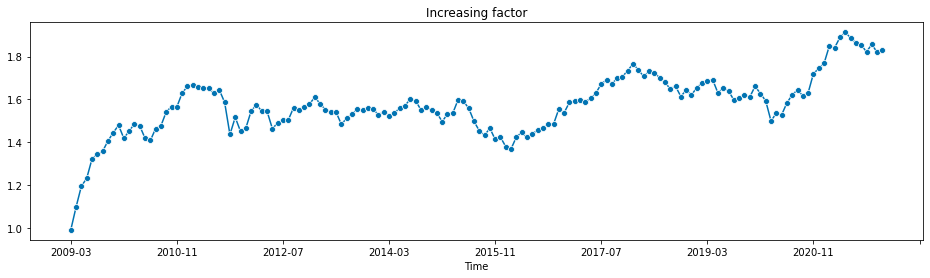

In [4]:
fig1, ax1 = plot_series(X1_month)
ax1.set(xlabel="Time", title='Increasing factor' )

In [5]:
X_train, X_test = temporal_train_test_split(X1_month)
fh = np.arange(1, len(X_test) + 1)  # forecasting horizon

0.09007874246868423

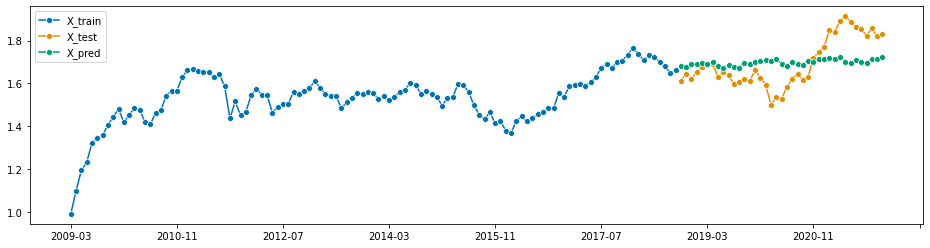

In [6]:
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

0.10077020220512821

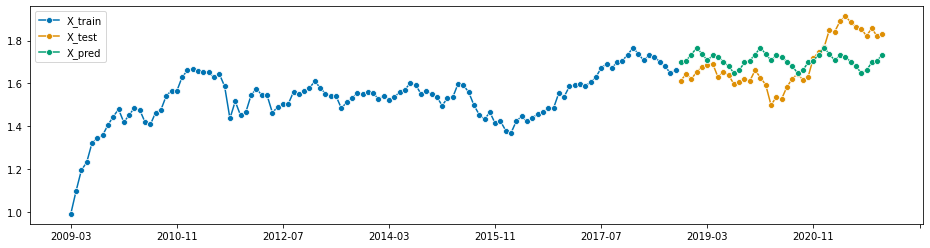

In [7]:
forecaster = NaiveForecaster(strategy="last", sp=12)  # monthly seasonal periodicity
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

0.09070823064137713

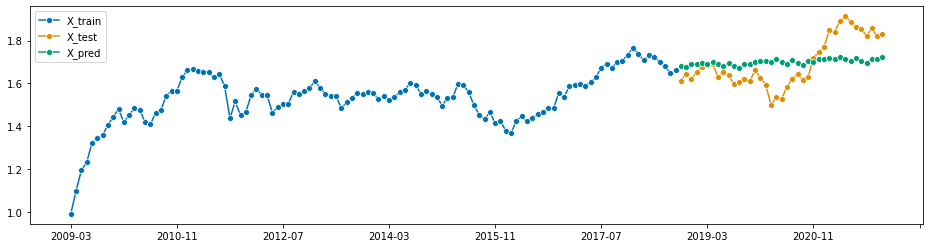

In [8]:
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

0.09205826115318838

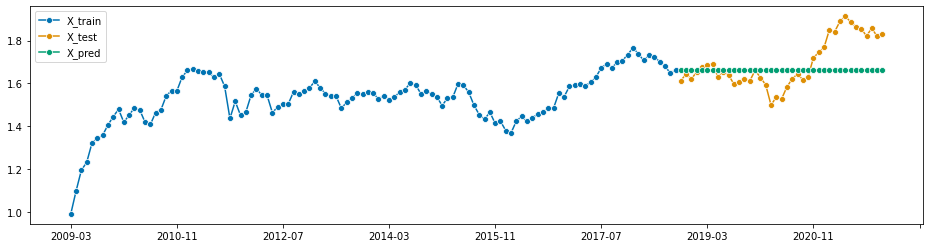

In [9]:
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

0.08827706345923204

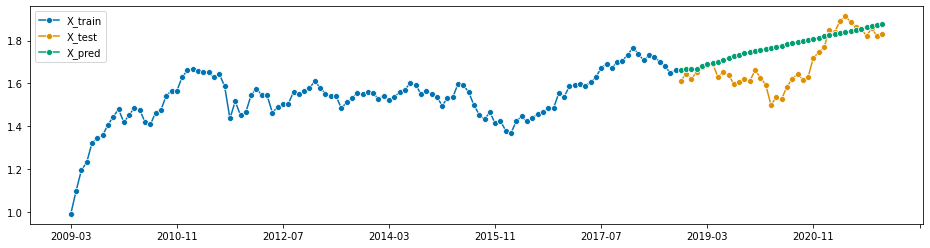

In [10]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

0.10621376136497471

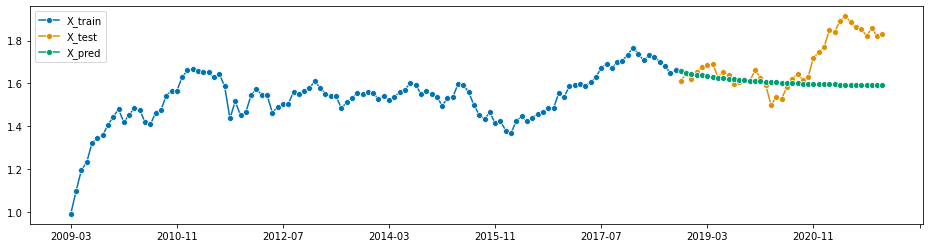

In [11]:
forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

0.10621376136497471

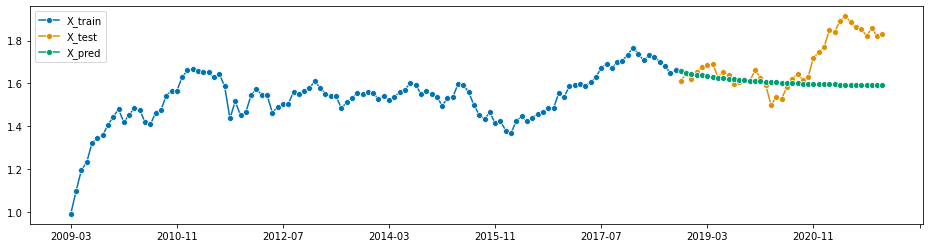

In [12]:
forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

In [24]:
X2 = pd.Series(df['利率'].values, index=df.index)
X2_month = X2.resample('BM').bfill()
X2_month.index = X2_month.index.to_period()
X2_month = X2_month.pad()

[Text(0.5, 0, 'Time'), Text(0.5, 1.0, 'Rate factor')]

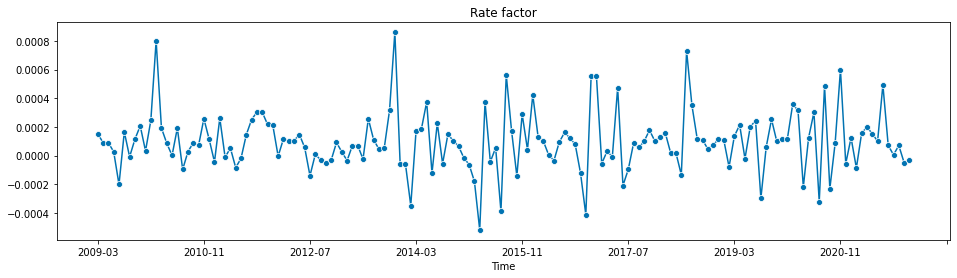

In [25]:
fig, ax = plot_series(X2_month)
ax.set(xlabel="Time", title='Rate factor' )

In [26]:
X_train, X_test = temporal_train_test_split(X2_month)
fh = np.arange(1, len(X_test) + 1)  # forecasting horizon

In [27]:
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

0.0001992571282051282

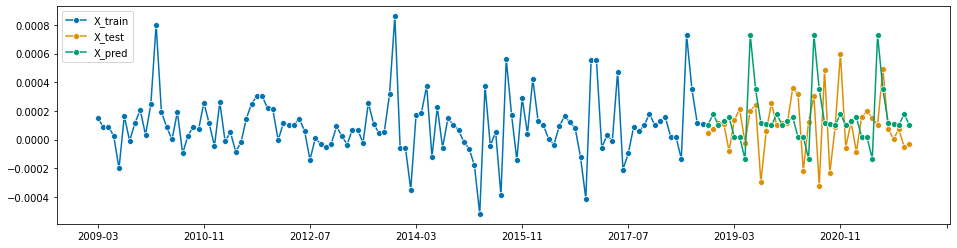

In [28]:
forecaster = NaiveForecaster(strategy="last", sp=12)  # monthly seasonal periodicity
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

0.00016164380161757643

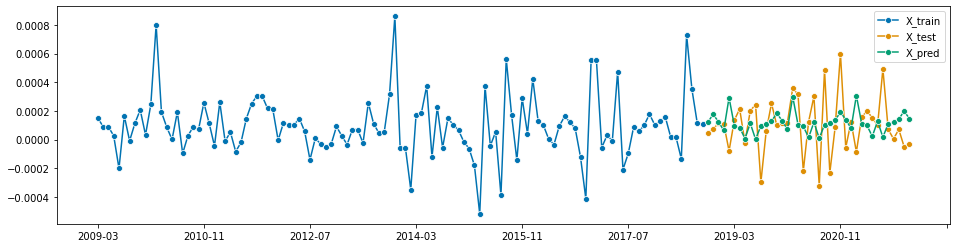

In [33]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

C:\Users\DaryLLS\.conda\envs\env8\lib\site-packages\sktime\forecasting\ets.py:245: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(


0.00014178362035687628

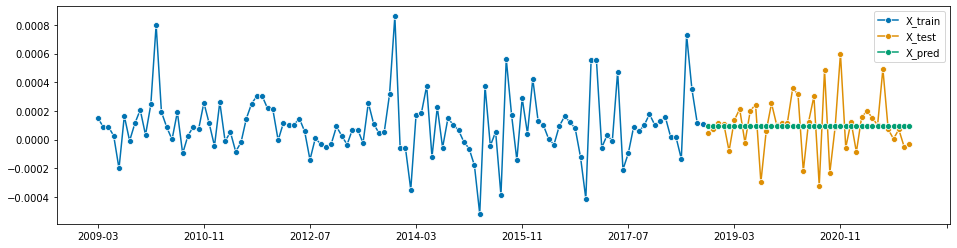

In [34]:
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

0.00014178299999999995

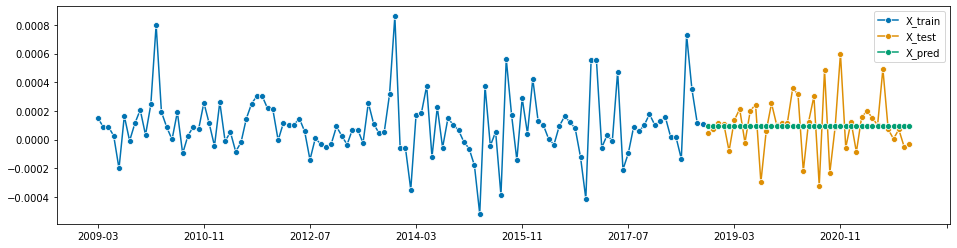

In [35]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

C:\Users\DaryLLS\.conda\envs\env8\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\DaryLLS\.conda\envs\env8\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


0.0001430241340965566

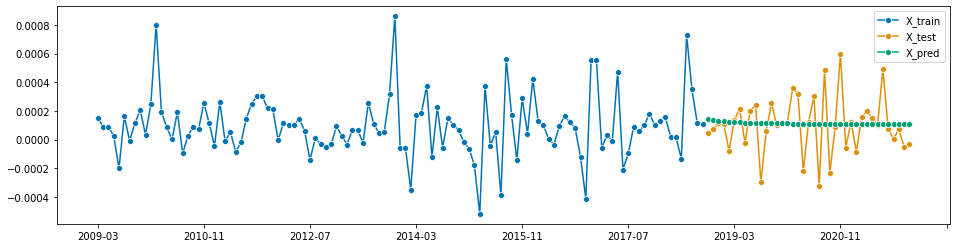

In [36]:
forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)

C:\Users\DaryLLS\.conda\envs\env8\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\DaryLLS\.conda\envs\env8\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


0.000153876760120152

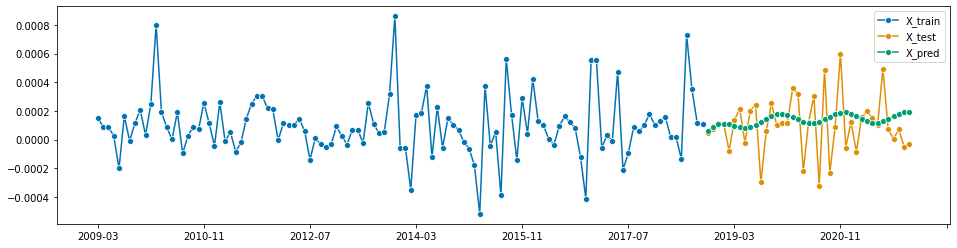

In [37]:
forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)
forecaster.fit(X_train)
X_pred = forecaster.predict(fh)
plot_series(X_train, X_test, X_pred, labels=["X_train", "X_test", "X_pred"])
mean_absolute_error(X_test, X_pred)